# Imports

In [1]:
import gymnasium as gym
from stable_baselines3 import DQN, HerReplayBuffer
from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt
import time

2023-10-27 13:38:47.350687: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-27 13:38:47.536136: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 13:38:48.371927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Environment

In [2]:
env = gym.make("CartPole-v1")
env.reset()

(array([-0.04578011, -0.02954329,  0.04232255, -0.03753457], dtype=float32),
 {})

# Model

In [7]:
# Instantiate the agent
model = DQN("MlpPolicy", 
            env, 
            verbose=0, 
            tensorboard_log="dqn_training_cartpole_v2")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


# Training

In [ ]:
time_steps = 10000
epochs = 25
path = "dqn_model"
for i in range(1, epochs):
    model.learn(total_timesteps=time_steps, reset_num_timesteps= False ,tb_log_name="cartpole")
    model.save("%s/%s" % (path , i))

# Save model

In [8]:
model.save("cartpole_trained")
del model  

# Load Previously trained model

In [4]:
env = gym.make("CartPole-v1")
model = DQN.load("cartpole_trained", env=env)

# Test Model : Reward / episode

In [5]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
cum_reward = 0 
ep_reward = []
i = 0
while (True):
    action, _states = model.predict(obs, deterministic=True)
    #print(action)
    obs, rewards, done, info = vec_env.step(action)
    #vec_env.render("human")
    cum_reward += rewards
    if done:
      obs = vec_env.reset()
      i += 1
      ep_reward.append(cum_reward)
      cum_reward = 0
      if (i > 100):
        break

vec_env.close()
env.close()

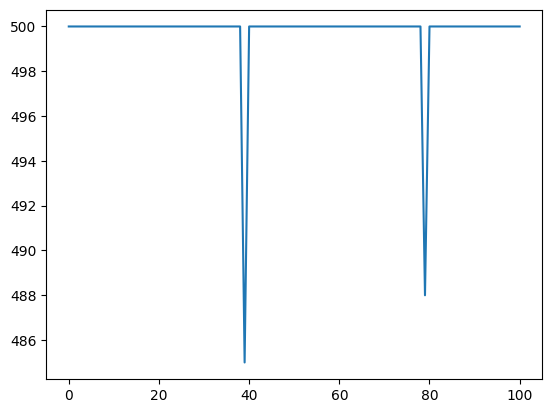

In [11]:
plt.plot(ep_reward)